In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.ndimage as ndi
import plotly.graph_objects as go
import pandas as pd

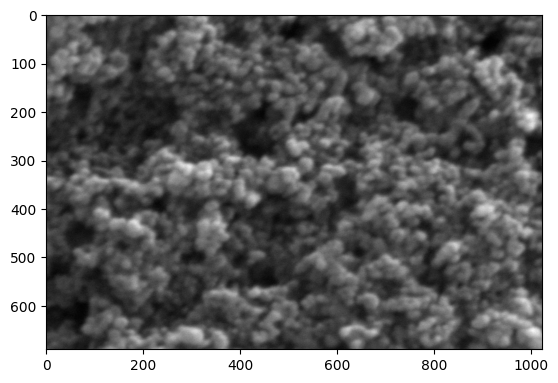

In [2]:
# Load the grayscale microscopic image using Pillow
image_path = "img/test.tif"
image = Image.open(image_path).convert('L')

# Convert the image to a NumPy array
image_array = np.array(image)[:690]
plt.imshow(image_array, cmap='gray')

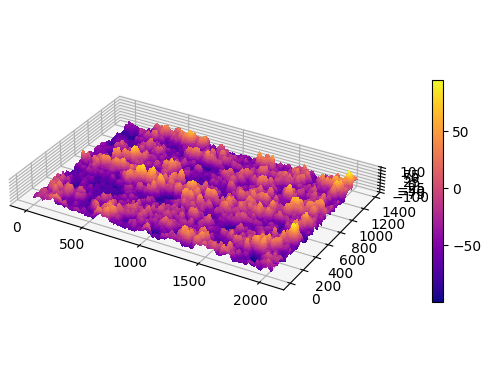

In [3]:
# Normalize image intensity to the range [-1, 1]
normalized_image = 2.0 * (image_array - np.min(image_array)) / np.ptp(image_array) - 1

# Define the depth difference assumption (e.g., 200 nm)
depth_difference_nm = 100
normalized_image = normalized_image * depth_difference_nm

# Find Scale of x, y axis
# Determine the scale of the x and y axes
pixel_length_ratio = 100 / 50  # Length per pixel
x_scale = np.arange(image_array.shape[1]) * pixel_length_ratio
y_scale = np.arange(image_array.shape[0]) * pixel_length_ratio

x_mesh, y_mesh = np.meshgrid(x_scale, y_scale)

# Create a 3D plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Create the 3D depth surface plot with a chosen colormap
colormap = plt.get_cmap('plasma')  # Choose your preferred colormap
surface = ax.plot_surface(x_mesh, y_mesh, normalized_image, cmap=colormap, rstride=1, cstride=1, linewidth=0, antialiased=False)

# Add a colorbar to the plot
colorbar = fig.colorbar(surface, shrink=0.6, aspect=20, pad=0.12)

# Set the aspect ratio of the 3D plot
ax.set_box_aspect((np.ptp(x_mesh), np.ptp(y_mesh), np.ptp(normalized_image)))

# Display the 3D plot
plt.show()

##### I Created Custom function to these operations

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_3d_microscopic_image(image_path, depth_difference_nm, pixel_length_ratio):
    """
    Plot a 3D representation of a microscopic image.

    Parameters:
    - image_path (str): The path to the image file.
    - depth_difference_nm (int): The depth difference in nano meters.
    - pixel_length_ratio (float): Scaling factor for x and y axes (how much length in nano meters equal to one pixel).
    
    Example usage:
        image_path = "img/test.tif"
        depth_difference_nm =100
        pixel_length_ratio = 100 / 50
        plot_3d_microscopic_image(image_path, depth_difference_nm, pixel_length_ratio)
    """
    # Load the grayscale microscopic image
    grayscale_image = Image.open(image_path).convert('L')

    # Convert the image to a NumPy array
    image_array = np.array(grayscale_image)
    image_array = image_array[:690]  # Crop the image if needed

    # Normalize the image to the range [-1, 1]
    normalized_image = 2.0 * (image_array - np.min(image_array)) / np.ptp(image_array) - 1

    # Calculate the depth information based on the provided depth difference
    normalized_image = normalized_image * depth_difference_nm

    # Determine the scale of the x and y axes
    x_scale = np.arange(image_array.shape[1]) * pixel_length_ratio
    y_scale = np.arange(image_array.shape[0]) * pixel_length_ratio

    x_mesh, y_mesh = np.meshgrid(x_scale, y_scale)

    # Create a 3D plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Create the 3D depth surface plot with a chosen colormap
    colormap = plt.get_cmap('plasma')  # Choose your preferred colormap
    surface = ax.plot_surface(x_mesh, y_mesh, normalized_image, cmap=colormap, rstride=1, cstride=1, linewidth=0, antialiased=False)

    # Add a colorbar to the plot
    colorbar = fig.colorbar(surface, shrink=0.6, aspect=20, pad=0.12)

    # Set the aspect ratio of the 3D plot
    ax.set_box_aspect((np.ptp(x_mesh), np.ptp(y_mesh), np.ptp(normalized_image)))

    plt.savefig(image_path+"_export.png", transparent=True)

    # Display the 3D plot
    plt.show()

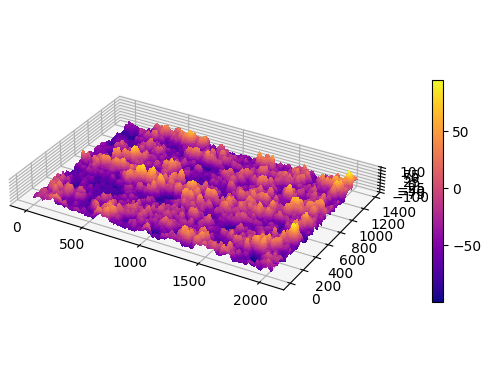

In [5]:
plot_3d_microscopic_image("img/img01.tif", 100, 100/50)

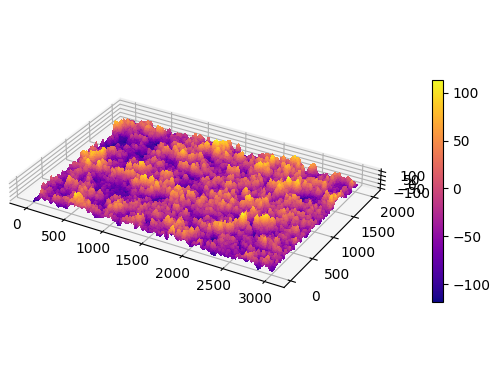

In [6]:
plot_3d_microscopic_image("img/img02.tif", 120, 100/34)

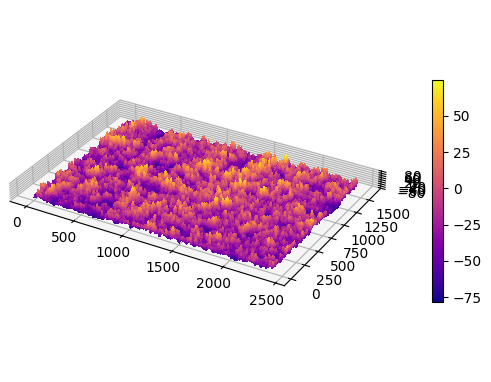

In [7]:
plot_3d_microscopic_image("img/img03.tif", 80, 200/85)

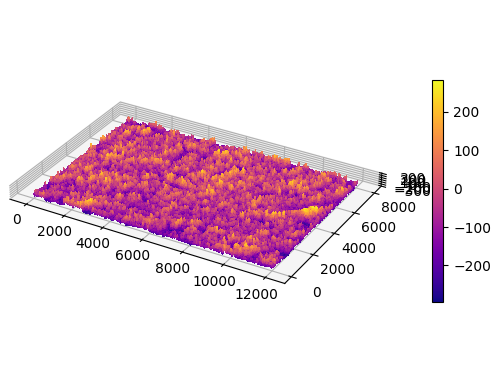

In [8]:
plot_3d_microscopic_image("img/img04.tif", 300, 1000/85 )

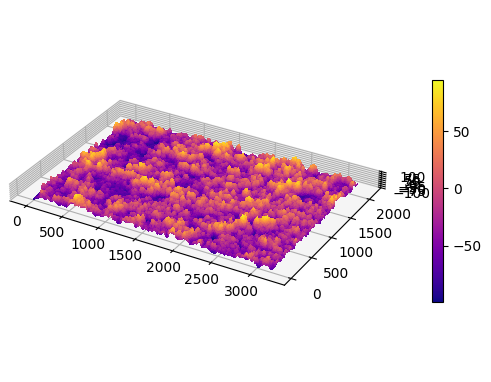

In [9]:
plot_3d_microscopic_image("img/5L.tif", 100, 100/32 )

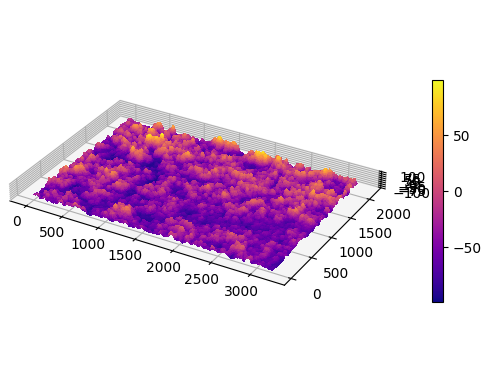

In [10]:
plot_3d_microscopic_image("img/5L+Gr(No 6L).tif", 100, 100/32 )

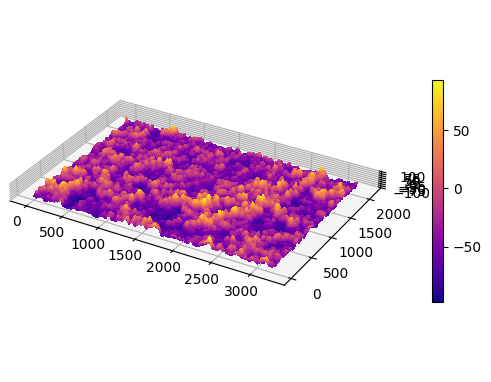

In [11]:
plot_3d_microscopic_image("img/5L+Gr(TiO2 6L).tif", 100, 100/32  )

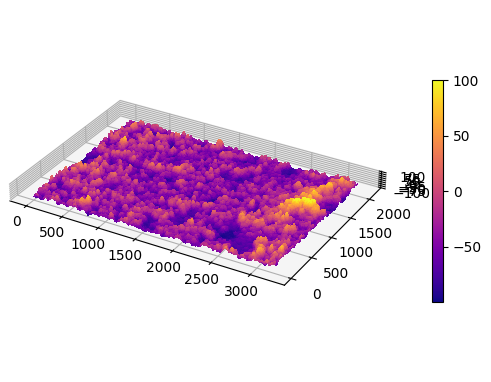

In [12]:
plot_3d_microscopic_image("img/6L.tif", 100, 100/32 )

In [19]:
def mean_hight_finder(image_path):
    """
    Find Mean high ??? idk bro
    
    Parameters:
    - image_path (str): The path to the image file.

    Example usage:
        image_path = "img/test.tif"
    """
    # Load the grayscale microscopic image
    grayscale_image = Image.open(image_path).convert('L')

    # Convert the image to a NumPy array
    image_array = np.array(grayscale_image)
    image_array = image_array[:690]  # Crop the image if needed

    # Normalize the image to the range [-1, 1]
    fill = image_array - np.min(image_array)
    empty = np.max(image_array) - image_array

    # Calculate the percentage
    fill_per = np.mean(fill)/np.ptp(image_array)
    empty_per = np.mean(empty)/np.ptp(image_array)
    
    print(image_path[4:])
    print("Fill Percentage  : " + str(fill_per))
    print("Empty Percentage : " + str(empty_per))
    print("Range            : " + str(np.min(image_array)),"-" ,str(np.max(image_array)) + "\n")
    

In [20]:
mean_hight_finder("img/img01.tif")
mean_hight_finder("img/img02.tif")
mean_hight_finder("img/img03.tif")
mean_hight_finder("img/img04.tif")
mean_hight_finder("img/5L.tif")
mean_hight_finder("img/5L+Gr(No 6L).tif")
mean_hight_finder("img/5L+Gr(TiO2 6L).tif")
mean_hight_finder("img/6L.tif")

img01.tif
Fill Percentage  : 0.3020355259835513
Empty Percentage : 0.6979644740164486
Range            : 0 - 226

img02.tif
Fill Percentage  : 0.33793001136326545
Empty Percentage : 0.6620699886367346
Range            : 0 - 222

img03.tif
Fill Percentage  : 0.28764719984836656
Empty Percentage : 0.7123528001516335
Range            : 21 - 202

img04.tif
Fill Percentage  : 0.2892669235450634
Empty Percentage : 0.7107330764549366
Range            : 16 - 208

5L.tif
Fill Percentage  : 0.33793001136326545
Empty Percentage : 0.6620699886367346
Range            : 0 - 222

5L+Gr(No 6L).tif
Fill Percentage  : 0.28256621447028424
Empty Percentage : 0.7174337855297157
Range            : 12 - 141

5L+Gr(TiO2 6L).tif
Fill Percentage  : 0.3002631543061727
Empty Percentage : 0.6997368456938274
Range            : 19 - 156

6L.tif
Fill Percentage  : 0.29683460194350986
Empty Percentage : 0.7031653980564901
Range            : 3 - 255

